# 1. Kid's Game

In [1]:
from random import randint


def get_responses():
    try:
        quot = int(input("Enter the Quotient: "))
        rem = int(input("Enter the Remainder: "))
    except ValueError:
        print("Please enter an integer!")
        return get_responses()

    return quot, rem


def game(n=1):
    if n < 1:
        raise ValueError("Number of rounds must be at least 1!")

    for _ in range(n):
        divisor = randint(1, 9)
        dividend = randint(1, 1000)

        true_quot = dividend // divisor
        true_rem = dividend % divisor

        print(f"{dividend} / {divisor} =\n")

        quot, rem = get_responses()

        correct = (quot == true_quot) and (rem == true_rem)

        if correct:
            print("\nCorrect.\n")
        else:
            print("\nIncorrect.\n")

In [2]:
game(1)

808 / 1 =



Enter the Quotient:  808
Enter the Remainder:  0



Correct.



# 2.a) Slope between two points w/ lambda

In [3]:
from math import inf


def g(a, b, f=lambda x: x**2 + 3 * x - 7):
    if a == b:
        return inf

    slope = (f(b) - f(a)) / (b - a)

    return slope

In [4]:
print(g(5, 13))
print(g(-4, 6))

21.0
5.0


# 2.b) Info function

In [5]:
from math import sqrt


def midpoint(a, b, f):
    fa = f(a)
    fb = f(b)
    return (a + b) / 2, (fa + fb) / 2


def length(a, b, f):
    fa = f(a)
    fb = f(b)

    return sqrt((fa - fb) ** 2 + (a - b) ** 2)


def info(a, b):
    f = lambda x: x**2 + 5 * x - 7
    slope = g(a, b, f)
    mp = midpoint(a, b, f)
    l = length(a, b, f)

    print(
        30 * "=",
        "INFO: f(x) = x^2 + 5x -7",
        30 * "=",
        f"x1={a}",
        f"x2={b}",
        30 * "=",
        f"f({a}) = {f(a):.2f}",
        f"f({b}) = {f(b):.2f}",
        f"{slope = :.2f}",
        f"midpoint = ({mp[0]:.2f}, {mp[1]:.2f})",
        f"length = {l:.2f}",
        sep="\n",
    )

In [6]:
info(5, 13)

INFO: f(x) = x^2 + 5x -7
x1=5
x2=13
f(5) = 43.00
f(13) = 227.00
slope = 23.00
midpoint = (9.00, 135.00)
length = 184.17


# 3. Integrate a function by one trapezoid

In [7]:
def trapezint1(f, a, b):
    return (b - a) * 0.5 * (f(a) + f(b))

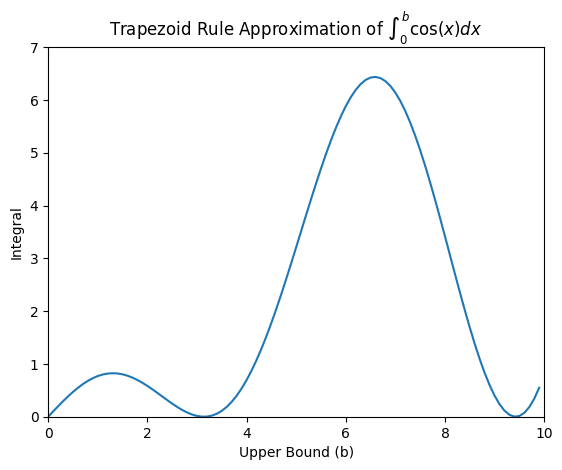

In [55]:
import matplotlib.pyplot as plt
import numpy as np

a = 0
b = np.linspace(0, 10, endpoint=False, num=100)
f = np.cos

I = trapezint1(f, a, b)

plt.plot(b, I)
plt.ylabel("Integral")
plt.xlabel("Upper Bound (b)")
plt.xlim(0, 10)
plt.ylim(0, 7)
plt.title(r"Trapezoid Rule Approximation of $\int_0^b \cos(x) dx$")

plt.show()

# 4. Detecting Trends Language on Twitter

In [9]:
import re


def rank_hashtags(N=None):
    with open("twitter_data.txt") as f:
        text = f.read()

    hashtags = re.findall("\#\w+", text)
    freq = dict.fromkeys(set(hashtags), 0)
    for ht in hashtags:
        freq[ht] += 1

    ranked_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)

    with open("top_hashtags.txt", "w") as f:
        for i, (ht, count) in enumerate(ranked_freq):
            if N is not None and i > N - 1:
                break
            f.write(f"{ht} {count}\n\n")

In [10]:
rank_hashtags(3)

# 5. Stockholm Data

In [11]:
def to_farenheit(C):
    """Converts a temperature in Celsius to Farenheit."""
    return 32.0 + (9 / 5) * C

In [12]:
def analyze_stockholm_data():
    # Part a
    stockholm_data = np.loadtxt("stockholm_td_adj.dat")

    # Part b
    years = (
        stockholm_data[:, 0] + stockholm_data[:, 1] / 12 + stockholm_data[:, 2] / 365
    )
    avg_daily_temp_C = np.mean(stockholm_data[:, 3:], axis=1)
    avg_daily_temp_F = to_farenheit(avg_daily_temp_C)

    nineteenth_century = (years >= 1800) & (years < 1900)
    twentieth_century = (years >= 1900) & (years < 2000)
    twentyfirst_century = (years >= 2000) & (years < 2100)

    # Part c
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

    ax1.plot(years[twentieth_century], avg_daily_temp_F[twentieth_century])
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Temperature [$^\circ$F]")
    ax1.set_xlim(1900, 2000)
    ax1.set_title("Average Daily Temperature in 20th Century Stockholm")

    # Part d
    cent19_temps = avg_daily_temp_F[nineteenth_century]

    bins = int(np.sqrt(cent19_temps.shape[0]))

    ax2.hist(cent19_temps, bins=bins)

    ax2.set_xlabel("Temperature [$^\circ$F]")
    ax2.set_ylabel("Number of Days")
    ax2.set_title("Frequency of Average Daily Temperatures in 19th Century Stockholm")

    plt.show()

    # Part e
    np.savez_compressed("a", stockholm_data[nineteenth_century, :])
    np.savez_compressed("b", stockholm_data[twentieth_century, :])
    np.savez_compressed("c", stockholm_data[twentyfirst_century, :])

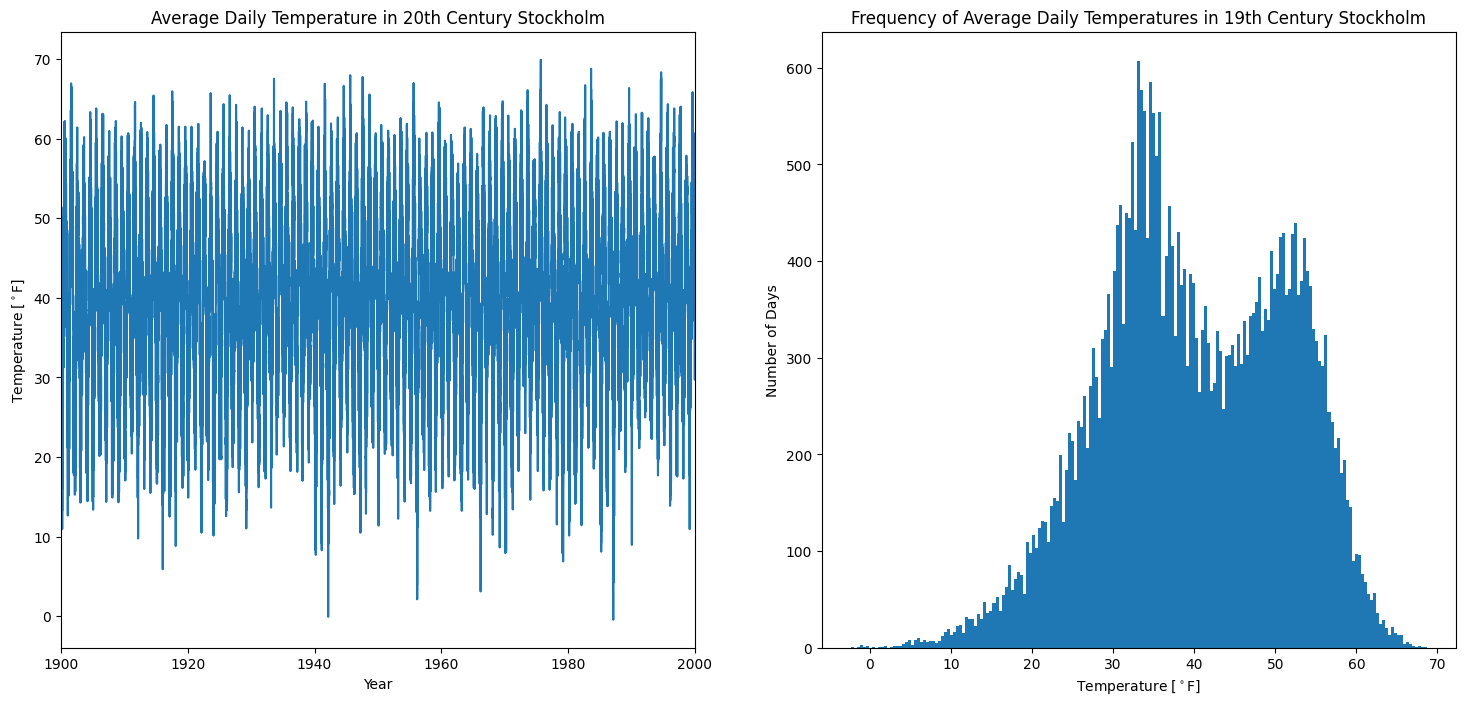

In [13]:
analyze_stockholm_data()